# DecisionTreeRegressor on Housing

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor 

import graphviz 
import seaborn as sns 
sns.set()

In [2]:
data = pd.read_csv("data/housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Nehmen wir nur die Ortskoordinaten als Eingabe $X$ für das KNR-Modell und den 'median_house_value' als Ausgabevariable $Y$, können wir durch Anpassen des Parameters $k$ sehen wie eine größer Wahl der Nachbarschaft ein Glättung des 'Bildes' entspricht. 

In [3]:
data_X = data[['latitude', 'longitude']] # features, independent variables 
data_y = data['median_house_value'] # target, dependent variable 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=11)

In [5]:
max_depth = 10

dTree = DecisionTreeRegressor(max_depth=max_depth)
dTree.fit(X_train, y_train)
y_prediction = dTree.predict(X_test)

In [6]:
print("MSE:", mean_squared_error(y_test, y_prediction))
print("RMSE:", np.sqrt(((y_test - y_prediction) ** 2).mean()))
print("R²:", r2_score(y_test, y_prediction))
print("RMSE % of mean:", np.sqrt(((y_test - y_prediction) ** 2).mean()) / y_test.mean())
print("Calibration:", y_prediction.mean() / y_test.mean())

MSE: 4288960999.7515006
RMSE: 65490.15956425439
R²: 0.6812564062222397
RMSE % of mean: 0.31128666608755157
Calibration: 0.9934539344184041


In [7]:
""" --------------------------------------------------------------------
starts by defining empty lists to be filled by the for loop, 
then iterates over all steps up to max_depth 
-------------------------------------------------------------------- """

depth_of_tree = []
MSE = []
RMSE= []
R2 = []
RMSE_of_mean = []
Calibration = []

max_depth = 13

for i in list(range(1, max_depth+1)):
    dTree = DecisionTreeRegressor(max_depth=i)
    dTree.fit(X_train, y_train)
    y_prediction = dTree.predict(X_test)
    depth_of_tree.append(i)
    MSE.append(mean_squared_error(y_test, y_prediction))
    RMSE.append(np.sqrt(((y_test - y_prediction) ** 2).mean()))
    R2.append(r2_score(y_test, y_prediction))
    RMSE_of_mean.append(np.sqrt(((y_test - y_prediction) ** 2).mean()) / y_test.mean())
    Calibration.append(y_prediction.mean() / y_test.mean())

In [8]:
# merge lists to a dataframe results_df 
results_df = pd.DataFrame(np.column_stack([depth_of_tree, MSE, RMSE, R2, RMSE_of_mean, Calibration]),
                         columns=["depth_of_tree", "MSE", "RMSE", "R2", "RMSE_of_mean", "Calibration"])

In [9]:
results_df

,depth_of_tree,MSE,RMSE,R2,RMSE_of_mean,Calibration
0,1.0,1.249069e+10,111761.772767,0.071727,0.531224,0.977632
1,2.0,1.133566e+10,106469.068442,0.157565,0.506067,0.977660
2,3.0,1.008954e+10,100446.679661,0.250174,0.477441,0.976876
3,4.0,8.146177e+09,90256.173820,0.394599,0.429004,0.984169
4,5.0,7.160528e+09,84619.901140,0.467850,0.402214,0.983163
5,6.0,6.308365e+09,79425.215433,0.531180,0.377523,0.985403
6,7.0,5.616923e+09,74946.136550,0.582566,0.356233,0.983984
7,8.0,5.091133e+09,71352.172763,0.621641,0.339150,0.987667
8,9.0,4.626198e+09,68016.161998,0.656194,0.323293,0.989122
9,10.0,4.283055e+09,65445.050665,0.681695,0.311072,0.993840


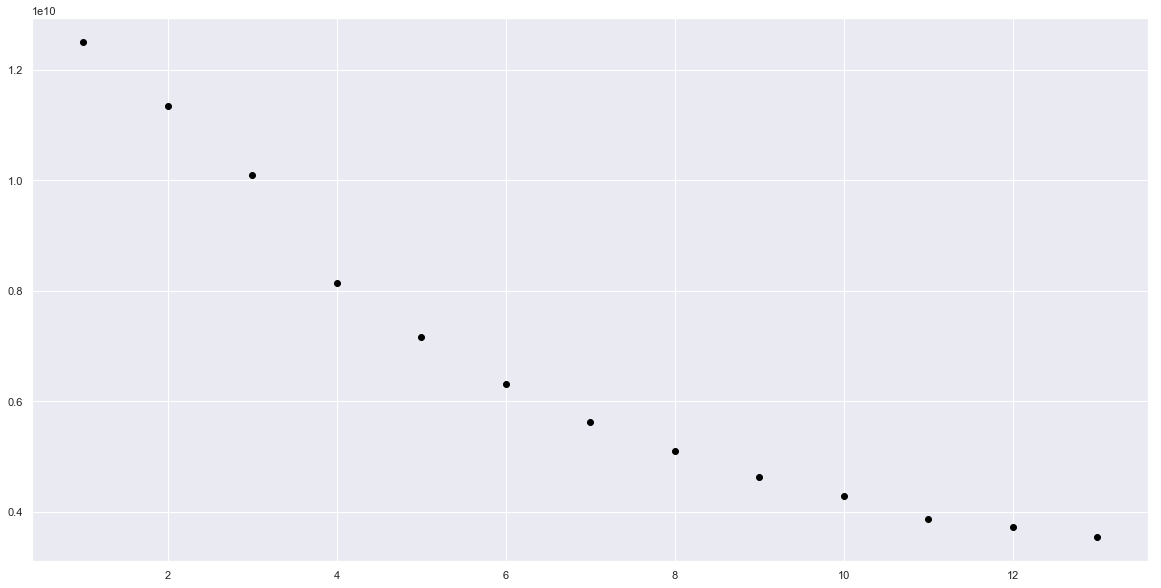

In [10]:
# Plot results 
plt.figure(figsize=(20,10))
plt.scatter(results_df["depth_of_tree"], results_df["MSE"], color='black')
plt.show();

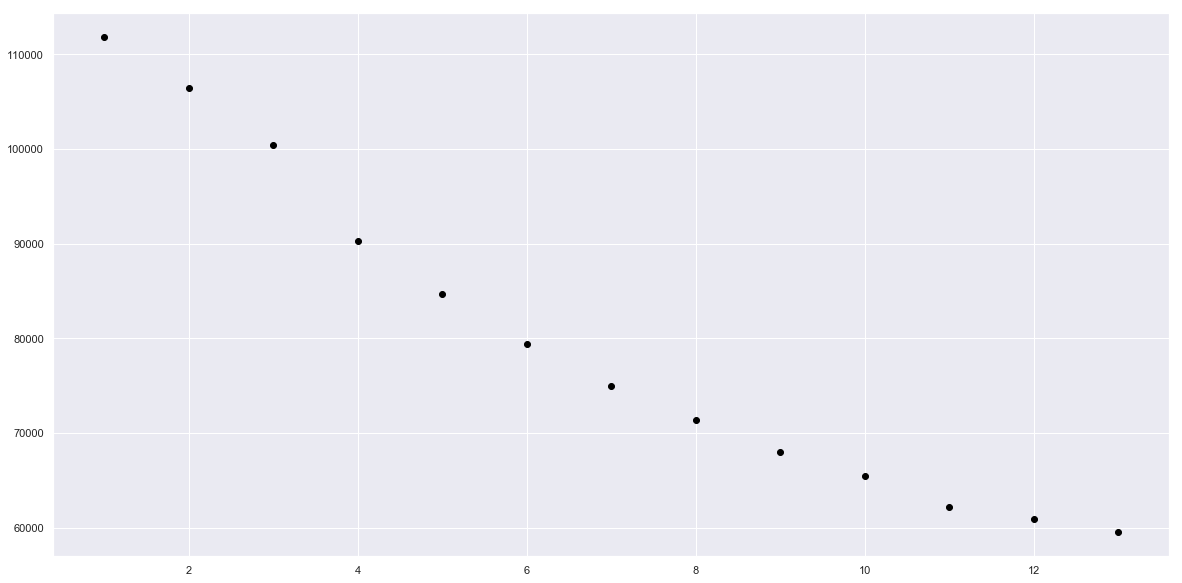

In [11]:
# Plot results 
plt.figure(figsize=(20,10))
plt.scatter(results_df["depth_of_tree"], results_df["RMSE"], color='black')
plt.show();

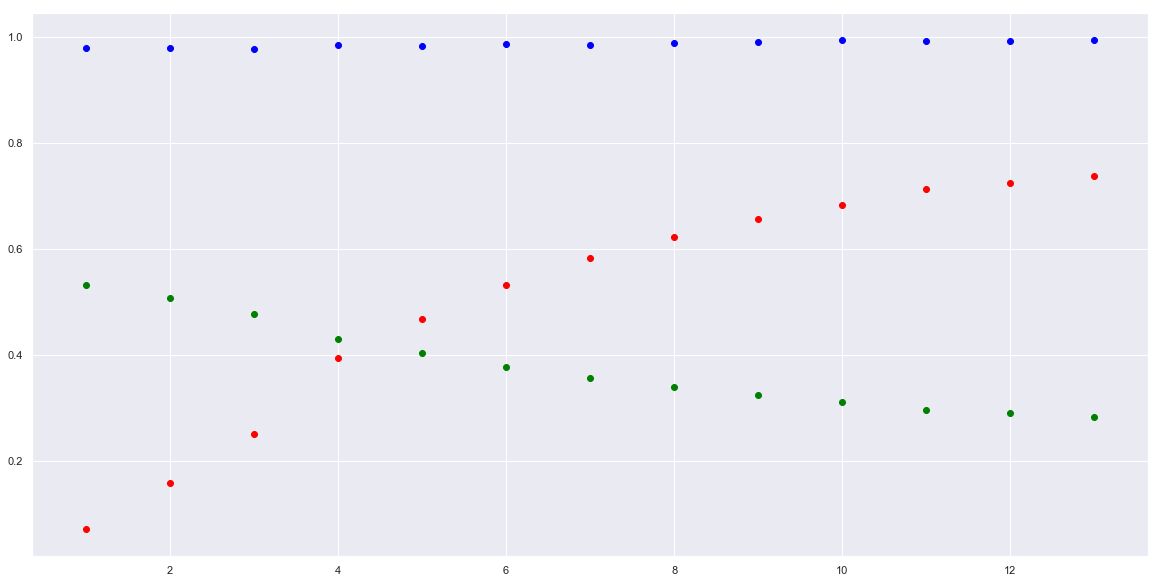

In [12]:
# Plot results 
plt.figure(figsize=(20,10))
plt.scatter(results_df["depth_of_tree"], results_df["R2"], color='red')
plt.scatter(results_df["depth_of_tree"], results_df["RMSE_of_mean"], color='green')
plt.scatter(results_df["depth_of_tree"], results_df["Calibration"], color='blue')
plt.show();